In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.metrics import roc_auc_score,roc_curve
import seaborn as sns

In [11]:
df = pd.read_csv("spamTrain1.csv", header=None)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,-1.0000,0.0,0.0000,-1.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,-1.0000,0.0,0.0045,-1.0000,0.0,0.0000,0.0159,0.0000,0.0022,...,-1.0,0.0,0.0088,0.0,0.0,0.0,-1.0000,0.0102,0.0011,1
3,0.0000,0.0050,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,0.0,-1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,-1.0,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-1.0000,0.0000,-1.0,0.0121,0.0000,0.0,0.0000,0.0000,-1.0000,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,-1.0,0.0000,0.0000,0.0000,0.0000,...,-1.0,0.0,-1.0000,-1.0,-1.0,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,-1.0000,0.0000,0.0000,0.0000,...,0.0,-1.0,0.0000,-1.0,0.0,0.0,0.0000,-1.0000,0.0000,0
1498,0.0000,-1.0000,0.0,-1.0000,0.0000,0.0,0.0000,0.0000,0.0000,-1.0000,...,0.0,-1.0,0.0000,0.0,0.0,-1.0,0.0000,0.0000,0.0188,0


<h1>Data Desc</h1>

<p>-1 Implies that the data is missing </p>
<p>Each feature corresponds to a word and denotes the proportion of all words in the email that match the given word</p>


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1500 non-null   float64
 1   1       1500 non-null   float64
 2   2       1500 non-null   float64
 3   3       1500 non-null   float64
 4   4       1500 non-null   float64
 5   5       1500 non-null   float64
 6   6       1500 non-null   float64
 7   7       1500 non-null   float64
 8   8       1500 non-null   float64
 9   9       1500 non-null   float64
 10  10      1500 non-null   float64
 11  11      1500 non-null   float64
 12  12      1500 non-null   float64
 13  13      1500 non-null   float64
 14  14      1500 non-null   float64
 15  15      1500 non-null   float64
 16  16      1500 non-null   float64
 17  17      1500 non-null   float64
 18  18      1500 non-null   float64
 19  19      1500 non-null   float64
 20  20      1500 non-null   float64
 21  21      1500 non-null   float64
 22  

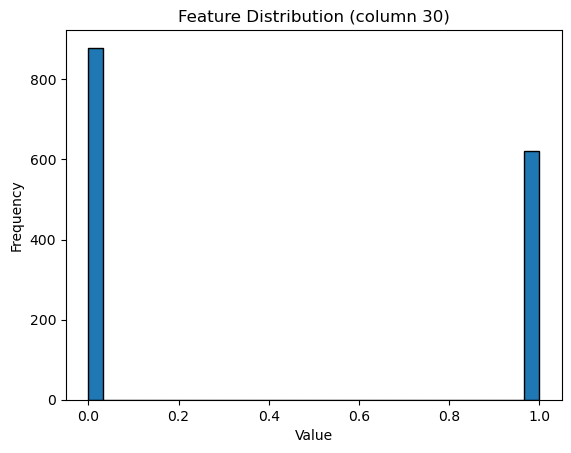

30
0    879
1    621
Name: count, dtype: int64


In [26]:
plt.hist(df[30], bins=30, edgecolor='black')
plt.title('Feature Distribution (column 30)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()
print(df[30].value_counts())

In [35]:
# Replace all the -1 with nan
df = df.replace(-1, np.nan)

In [36]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0000,0.0000,0.0,0.0014,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0029,1
1,0.0000,0.0000,0.0,0.0031,NaN,0.0,0.0000,NaN,0.0000,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0031,0.0094,1
2,0.0000,NaN,0.0,0.0045,NaN,0.0,0.0000,0.0159,0.0000,0.0022,...,NaN,0.0,0.0088,0.0,0.0,0.0,NaN,0.0102,0.0011,1
3,0.0000,0.0050,0.0,NaN,0.0000,0.0,NaN,0.0000,0.0000,0.0000,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0000,0.0000,0.0133,1
4,0.0100,0.0000,0.0,0.0000,0.0000,NaN,0.0125,0.0000,0.0000,0.0000,...,0.0,0.0,0.0093,0.0,0.0,0.0,0.0000,0.0000,0.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,0.0000,NaN,0.0121,0.0000,0.0,0.0000,0.0000,NaN,0.0243,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0060,0.0000,1
1496,0.0091,0.0033,0.0,0.0000,0.0091,NaN,0.0000,0.0000,0.0000,0.0000,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0000,0.0000,0.0000,0
1497,0.0000,NaN,0.0,NaN,0.0000,0.0,NaN,0.0000,0.0000,0.0000,...,0.0,NaN,0.0000,NaN,0.0,0.0,0.0000,NaN,0.0000,0
1498,0.0000,NaN,0.0,NaN,0.0000,0.0,0.0000,0.0000,0.0000,NaN,...,0.0,NaN,0.0000,0.0,0.0,NaN,0.0000,0.0000,0.0188,0


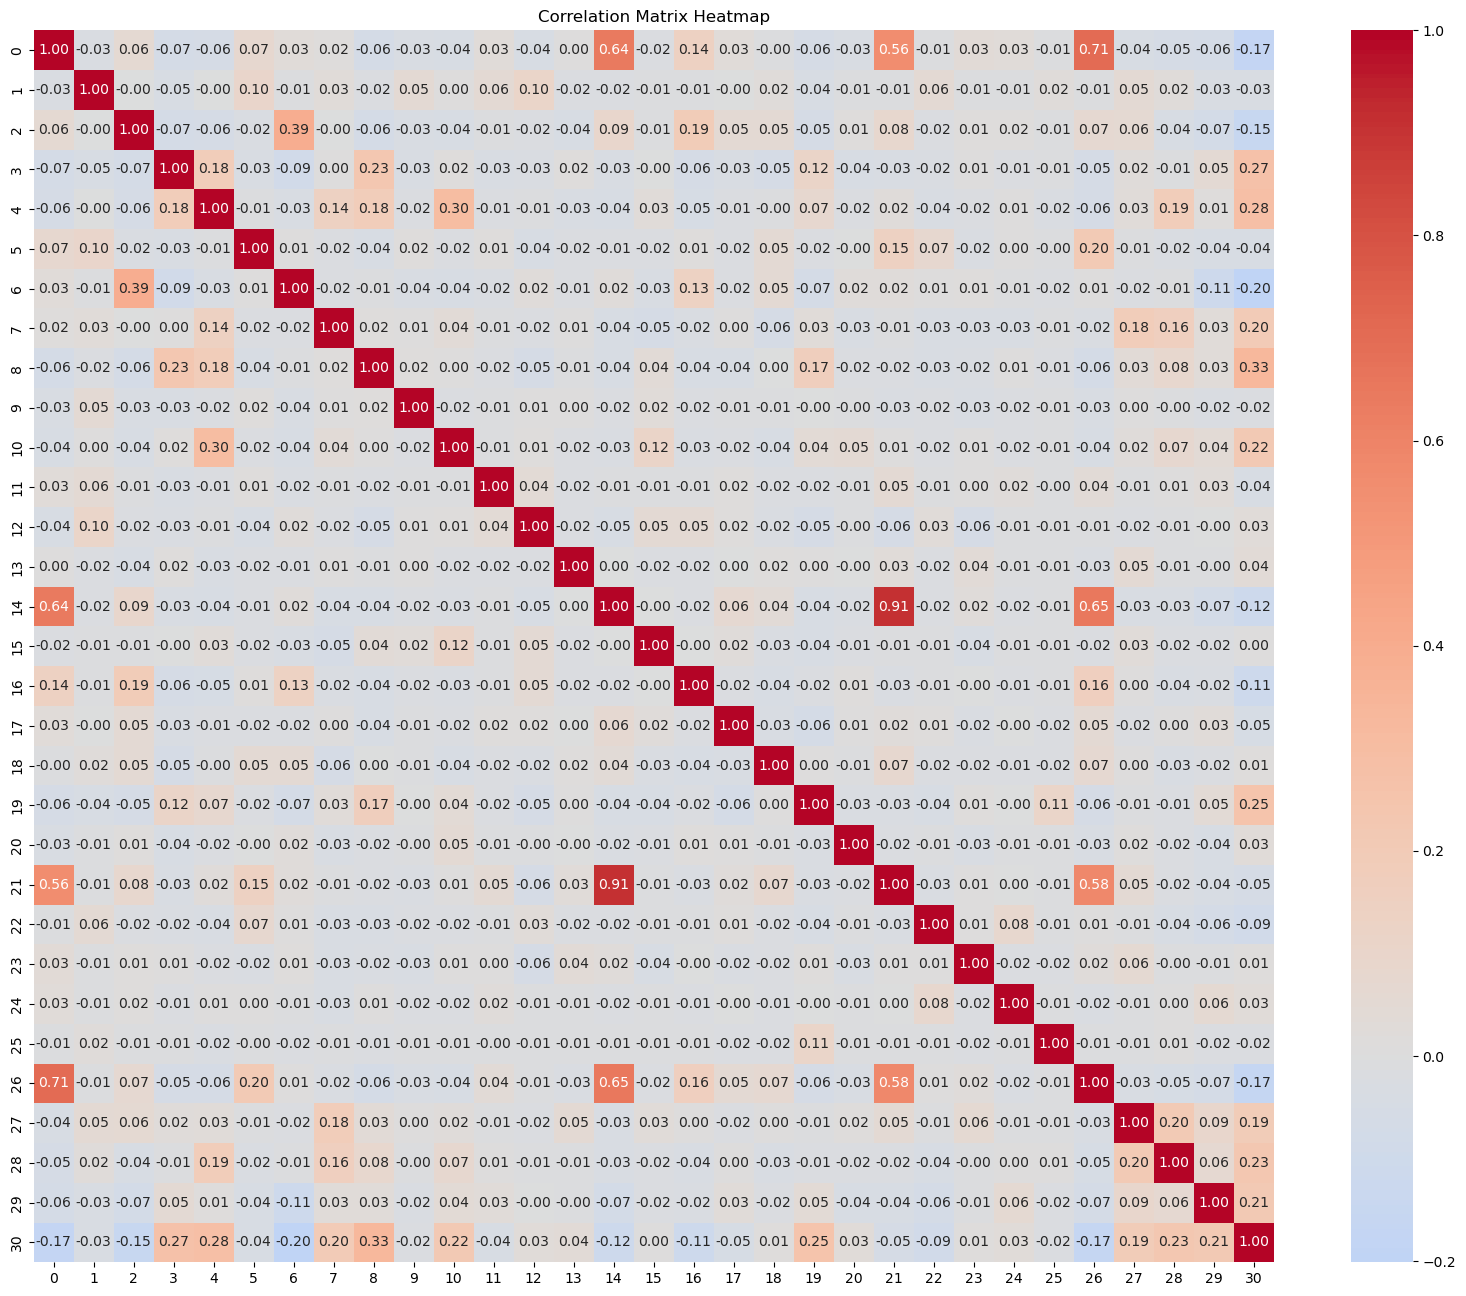

In [39]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


<h2>pandas.DataFrame.corr</h2>
<p> Compute pairwise correlation of columns, excluding NA/null values.</p>
<p>Clearly some columns are very similar in terms of linear relationship. We might interpet this as "words commonly used together" because the data represents the proportion of words found in a given email  </p>

In [45]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
count,1218.000000,1228.000000,1198.000000,1187.000000,1194.000000,1211.000000,1211.000000,1208.000000,1200.000000,1195.000000,...,1183.000000,1190.000000,1202.000000,1201.000000,1198.000000,1192.000000,1202.000000,1203.000000,1186.000000,1500.000000
mean,0.001055,0.001009,0.000509,0.003097,0.001587,0.000932,0.001239,0.002275,0.001234,0.002212,...,0.000642,0.000684,0.001879,0.001750,0.000118,0.000974,0.000446,0.000939,0.003211,0.414000
std,0.004931,0.003540,0.002524,0.006516,0.004990,0.005979,0.003599,0.005875,0.003964,0.013364,...,0.003316,0.005813,0.005615,0.012537,0.002218,0.004764,0.002284,0.003053,0.005652,0.492713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.003800,0.000000,0.000000,0.000000,0.001300,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004700,1.000000
max,0.058800,0.046800,0.035700,0.062500,0.071400,0.100000,0.045400,0.075500,0.054000,0.142800,...,0.047600,0.166600,0.090900,0.171000,0.074000,0.058800,0.023800,0.052600,0.043400,1.000000


In [49]:
features = df.iloc[:,:-1]
target = df.iloc[:,-1]

In [56]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1218 non-null   float64
 1   1       1228 non-null   float64
 2   2       1198 non-null   float64
 3   3       1187 non-null   float64
 4   4       1194 non-null   float64
 5   5       1211 non-null   float64
 6   6       1211 non-null   float64
 7   7       1208 non-null   float64
 8   8       1200 non-null   float64
 9   9       1195 non-null   float64
 10  10      1203 non-null   float64
 11  11      1191 non-null   float64
 12  12      1212 non-null   float64
 13  13      1195 non-null   float64
 14  14      1191 non-null   float64
 15  15      1186 non-null   float64
 16  16      1189 non-null   float64
 17  17      1223 non-null   float64
 18  18      1193 non-null   float64
 19  19      1210 non-null   float64
 20  20      1203 non-null   float64
 21  21      1183 non-null   float64
 22  

<h2>Dealing with NaNs</h2>
<p>We will have to use some imputation methods to deal with the missing values</p>
<p>Cannot drop misisng values, (99.8% data decrease), Impute mean or median or use regression technques </p>
<p>Split data into train and valudation. I don't believe that we need to scale the features due to them already being scaled by proportion </p>

In [62]:
features_mean_imputation = features.fillna(features.mean())
features_median_imputation = features.fillna(features.median()) # Basically filling NaN with 0's 

In [74]:
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_val, y_train, y_val = train_test_split(features_mean_imputation,target,test_size=0.3, random_state=42,shuffle=True)

In [82]:
y_val

1116    0
1368    0
422     0
413     0
451     0
       ..
1083    1
990     0
650     1
1188    1
1498    0
Name: 30, Length: 450, dtype: int64

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc


In [88]:
models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [89]:

def tpr_at_fpr(y_true, y_score, fpr_target=0.01):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    # Interpolate TPR at the target FPR
    return np.interp(fpr_target, fpr, tpr)


In [99]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    aucs = []
    tprs = []
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        model.fit(X_tr, y_tr)
        
        # Some models output probabilities, some don't
        if hasattr(model, "predict_proba"):
            y_scores = model.predict_proba(X_val)[:, 1]
        else:
            y_scores = model.decision_function(X_val)
        
        aucs.append(roc_auc_score(y_val, y_scores))
        tprs.append(tpr_at_fpr(y_val, y_scores, fpr_target=0.01))
    
    results[name] = {
        "Mean AUC": np.mean(aucs),
        "Mean TPR@1%FPR": np.mean(tprs)
    }
    print(f"Model: {name} | AUC: {aucs} | TPRS: {tprs}\n\n")

results


Model: GaussianNB | AUC: [np.float64(0.802231807951988), np.float64(0.8389909977494373), np.float64(0.754688672168042), np.float64(0.8425380805532193), np.float64(0.768713204373423)] | TPRS: [np.float64(0.13697674418604652), np.float64(0.06728682170542637), np.float64(0.054069767441860477), np.float64(0.06597701149425288), np.float64(0.07775862068965517)]


Model: LogisticRegression | AUC: [np.float64(0.8277381845461365), np.float64(0.8235183795948986), np.float64(0.791729182295574), np.float64(0.7723577235772358), np.float64(0.8784225773292217)] | TPRS: [np.float64(0.27906976744186046), np.float64(0.06976744186046512), np.float64(0.13953488372093023), np.float64(0.10344827586206896), np.float64(0.21839080459770116)]


Model: RidgeClassifier | AUC: [np.float64(0.8386159039759938), np.float64(0.8328019504876218), np.float64(0.7971680420105026), np.float64(0.7880571909167369), np.float64(0.8814129520605551)] | TPRS: [np.float64(0.2558139534883721), np.float64(0.09302325581395349), np.flo

C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:50:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

Model: XGBoost | AUC: [np.float64(0.9106339084771192), np.float64(0.8918792198049512), np.float64(0.8830645161290323), np.float64(0.8789832725913466), np.float64(0.8893561349406598)] | TPRS: [np.float64(0.45348837209302323), np.float64(0.27906976744186046), np.float64(0.46511627906976744), np.float64(0.27586206896551724), np.float64(0.2988505747126437)]




{'GaussianNB': {'Mean AUC': np.float64(0.801432552559222),
  'Mean TPR@1%FPR': np.float64(0.08041379310344829)},
 'LogisticRegression': {'Mean AUC': np.float64(0.8187532094686134),
  'Mean TPR@1%FPR': np.float64(0.1620422346966052)},
 'RidgeClassifier': {'Mean AUC': np.float64(0.8276112078902822),
  'Mean TPR@1%FPR': np.float64(0.16666666666666666)},
 'DecisionTree': {'Mean AUC': np.float64(0.7449684908611509),
  'Mean TPR@1%FPR': np.float64(0.03221879003476795)},
 'SVM': {'Mean AUC': np.float64(0.8926335890813186),
  'Mean TPR@1%FPR': np.float64(0.3563218390804598)},
 'XGBoost': {'Mean AUC': np.float64(0.8907834103886219),
  'Mean TPR@1%FPR': np.float64(0.35447741245656245)}}

In [91]:
df_results = pd.DataFrame(results).T.sort_values(by="Mean AUC", ascending=False)
print(df_results)


                    Mean AUC  Mean TPR@1%FPR
SVM                 0.892634        0.356322
XGBoost             0.890783        0.354477
RidgeClassifier     0.827611        0.166667
LogisticRegression  0.818753        0.162042
GaussianNB          0.801433        0.080414
DecisionTree        0.744968        0.032219


In [102]:
auc

np.float64(1.0)

C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\ekkoi\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:56:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtr

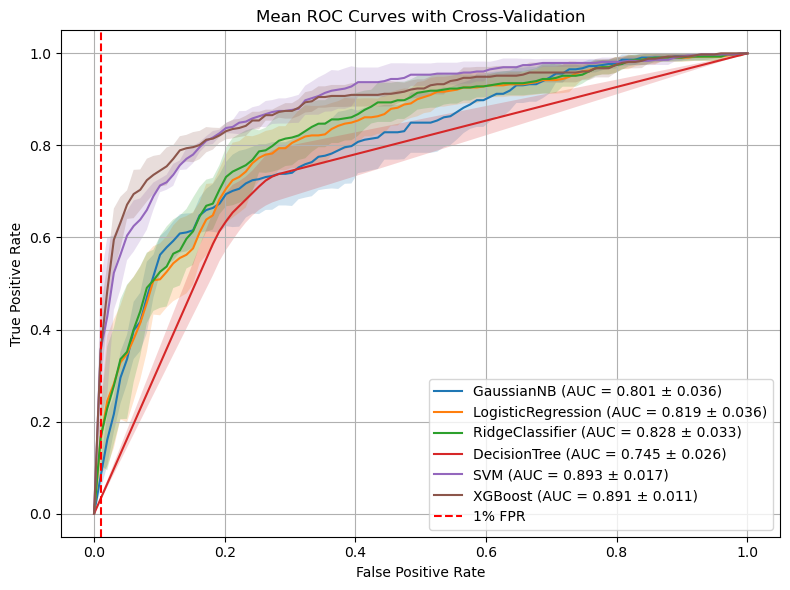

In [105]:
def plot_mean_roc(model, X, y, n_splits=5, label=None):
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_idx, val_idx in cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X.iloc[val_idx])[:, 1]
        else:
            y_score = model.decision_function(X.iloc[val_idx])
            
        fpr, tpr, _ = roc_curve(y.iloc[val_idx], y_score)
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        fold_auc = auc(fpr, tpr)
        aucs.append(fold_auc)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    
    plt.plot(mean_fpr, mean_tpr, label=f"{label} (AUC = {mean_auc:.3f} ± {std_auc:.3f})")
    plt.fill_between(mean_fpr,
                     np.maximum(mean_tpr - np.std(tprs, axis=0), 0),
                     np.minimum(mean_tpr + np.std(tprs, axis=0), 1),
                     alpha=0.2)

plt.figure(figsize=(8, 6))

for name, model in models.items():
    plot_mean_roc(model, X_train, y_train, label=name)

plt.axvline(x=0.01, color='red', linestyle='--', label='1% FPR')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Mean ROC Curves with Cross-Validation")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


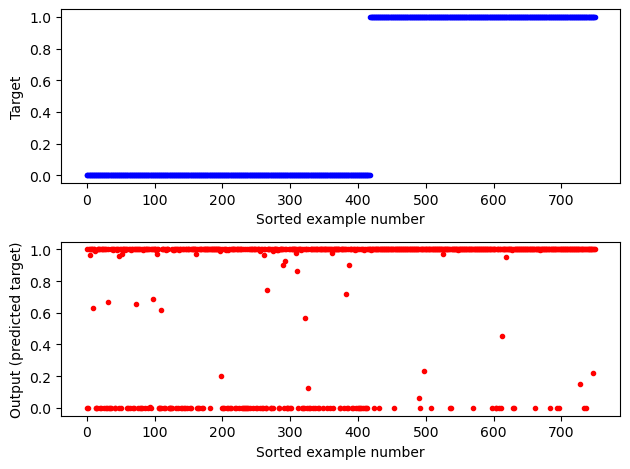

In [93]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()


Test set AUC: 0.8213626872630704
TPR at FPR = 0.01: 0.11277777777777777


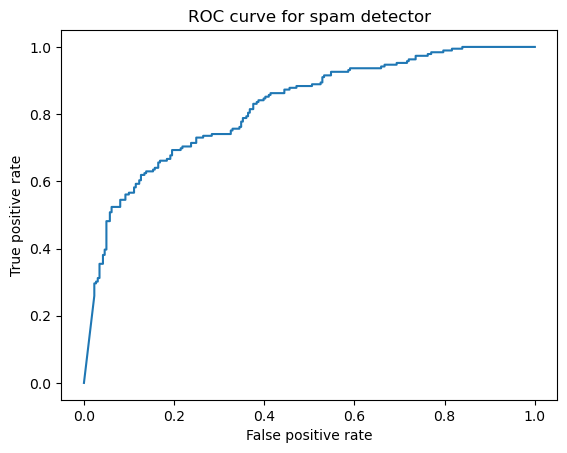

In [95]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain2.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr

"""
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
"""
## ******************* REPLACING HIS FEATURES WITH X_TRAIN Y_TRAIN ***************
trainFeatures = X_train
trainLabels = y_train
testFeatures = X_test
testLabels = y_test

testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()


Test set AUC: 0.8323834543352772
TPR at FPR = 0.01: 0.12267310789049919


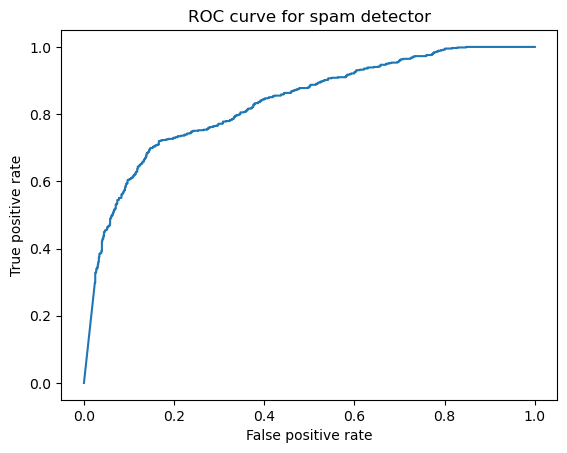

In [5]:
# -*- coding: utf-8 -*-
"""
Script used to evaluate classifier accuracy
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
#from classifySpam import predictTest
desiredFPR = 0.01
trainDataFilename = 'spamTrain1.csv'
testDataFilename = 'spamTrain1.csv'
#testDataFilename = 'spamTest.csv'
def tprAtFPR(labels,outputs,desiredFPR):
    fpr,tpr,thres = roc_curve(labels,outputs)
    # True positive rate for highest false positive rate < 0.01
    maxFprIndex = np.where(fpr<=desiredFPR)[0][-1]
    fprBelow = fpr[maxFprIndex]
    fprAbove = fpr[maxFprIndex+1]
    # Find TPR at exactly desired FPR by linear interpolation
    tprBelow = tpr[maxFprIndex]
    tprAbove = tpr[maxFprIndex+1]
    tprAt = ((tprAbove-tprBelow)/(fprAbove-fprBelow)*(desiredFPR-fprBelow)
    + tprBelow)
    return tprAt,fpr,tpr
trainData = np.loadtxt(trainDataFilename,delimiter=',')
testData = np.loadtxt(testDataFilename,delimiter=',')
# Separate labels (last column) from training and test data
trainFeatures = trainData[:,:-1]
trainLabels = trainData[:,-1]
testFeatures = testData[:,:-1]
testLabels = testData[:,-1]
testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
aucTestRun = roc_auc_score(testLabels,testOutputs)
tprAtDesiredFPR,fpr,tpr = tprAtFPR(testLabels,testOutputs,desiredFPR)
plt.plot(fpr,tpr)
print(f'Test set AUC: {aucTestRun}')
print(f'TPR at FPR = {desiredFPR}: {tprAtDesiredFPR}')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for spam detector')
plt.show()

10-fold cross-validation mean AUC:  0.8216676855824521
Test set AUC:  0.801125554850983


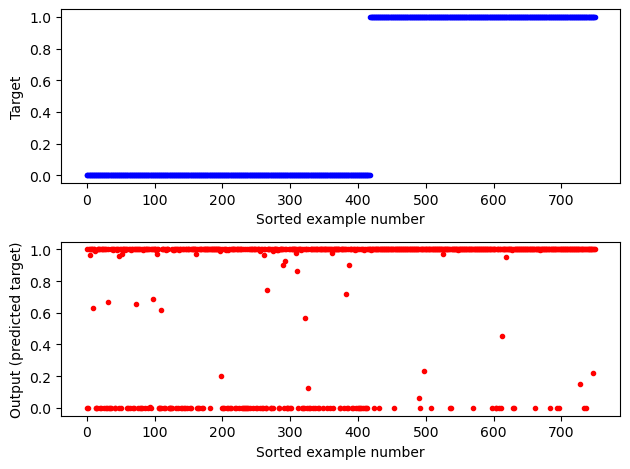

In [3]:
# -*- coding: utf-8 -*-
"""
Demo of 10-fold cross-validation using Gaussian naive Bayes on spam data
@author: Kevin S. Xu
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
def aucCV(features,labels):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    scores = cross_val_score(model,features,labels,cv=10,scoring='roc_auc')
    return scores
def predictTest(trainFeatures,trainLabels,testFeatures):
    # model = GaussianNB()
    model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
    GaussianNB())
    model.fit(trainFeatures,trainLabels)
    # Use predict_proba() rather than predict() to use probabilities rather
    # than estimated class labels as outputs
    testOutputs = model.predict_proba(testFeatures)[:,1]
    return testOutputs

    
# Run this code only if being used as a script, not being imported
if __name__ == "__main__":
    data = np.loadtxt('spamTrain1.csv',delimiter=',')
    # Separate labels (last column)
    features = data[:,:-1]
    labels = data[:,-1]
    # Evaluating classifier accuracy using 10-fold cross-validation
    print("10-fold cross-validation mean AUC: ",
    np.mean(aucCV(features,labels)))
    # Arbitrarily choose all odd samples as train set and all even as test set
    # then compute test set AUC for model trained only on fixed train set
    trainFeatures = features[0::2,:]
    trainLabels = labels[0::2]
    testFeatures = features[1::2,:]
    testLabels = labels[1::2]
    testOutputs = predictTest(trainFeatures,trainLabels,testFeatures)
    print("Test set AUC: ", roc_auc_score(testLabels,testOutputs))
    # Examine outputs compared to labels
    sortIndex = np.argsort(testLabels)
    nTestExamples = testLabels.size
    plt.subplot(2,1,1)
    plt.plot(np.arange(nTestExamples),testLabels[sortIndex],'b.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Target')
    plt.subplot(2,1,2)
    plt.plot(np.arange(nTestExamples),testOutputs[sortIndex],'r.')
    plt.xlabel('Sorted example number')
    plt.ylabel('Output (predicted target)')
    plt.tight_layout()
    plt.show()
